In [47]:
import pandas as pd


df = pd.read_csv('weather-check.csv')

In [48]:
df


,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [49]:
df['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].unique()

array(['Very likely', 'Somewhat likely', 'Very unlikely', '-',
       'Somewhat unlikely'], dtype=object)

In [50]:
df['US Region'].unique()

array(['South Atlantic', '-', 'Middle Atlantic', 'West South Central',
       'Pacific', 'West North Central', 'East North Central', 'Mountain',
       'New England', 'East South Central'], dtype=object)

In [51]:
df.rename(columns={'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?': 'degree of desire'}, inplace=True)

In [52]:
df.groupby('US Region')['degree of desire'].value_counts()

US Region           degree of desire 
-                   -                    11
                    Somewhat likely       7
                    Very unlikely         7
                    Very likely           4
                    Somewhat unlikely     2
East North Central  Very likely          63
                    Somewhat likely      38
                    Very unlikely        30
                    Somewhat unlikely    10
East South Central  Very likely          16
                    Somewhat likely      11
                    Very unlikely         8
                    Somewhat unlikely     6
Middle Atlantic     Very likely          45
                    Very unlikely        28
                    Somewhat likely      23
                    Somewhat unlikely     8
Mountain            Very likely          28
                    Somewhat likely      19
                    Very unlikely        18
                    Somewhat unlikely     7
New England         Very likely       

In [53]:
##Task 1

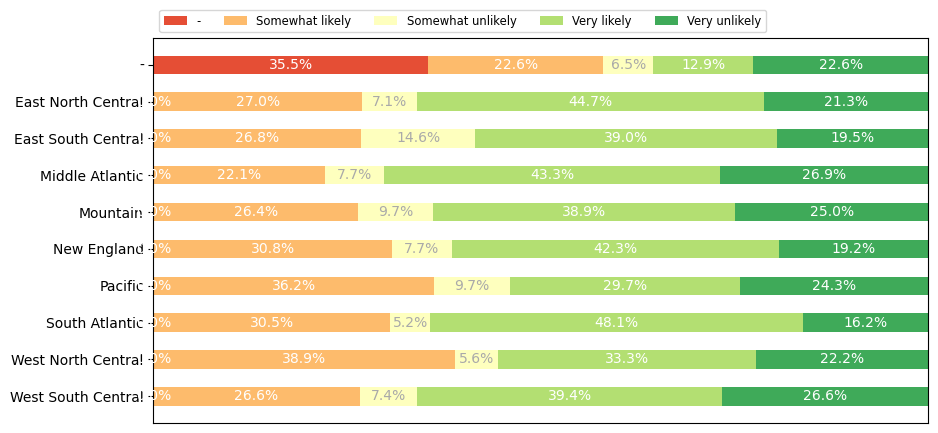

In [54]:
import matplotlib.pyplot as plt
import numpy as np




results = df.groupby('US Region')['degree of desire'].value_counts(normalize=True).unstack().fillna(0) * 100


category_names = results.columns
labels = results.index

def survey(results, category_names):
    data = np.array(results)  
    data_cum = data.cumsum(axis=1)  
    category_colors = plt.cm.RdYlGn(np.linspace(0.15, 0.85, data.shape[1]))  

    plt.figure(figsize=(10, 5))  
    plt.gca().invert_yaxis()  
    plt.gca().xaxis.set_visible(False)  
    plt.xlim(0, np.sum(data, axis=1).max()) 
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]  
        starts = data_cum[:, i] - widths  
        rects = plt.barh(labels, widths, left=starts, height=0.5,
                         label=colname, color=color)  

        r, g, b, _ = color  
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'  
        plt.bar_label(rects, labels=[f'{x:.1f}%' for x in widths], label_type='center', color=text_color)  

    plt.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
               loc='lower left', fontsize='small')  

    plt.show()


survey(results, category_names)


In [55]:
##Task 2

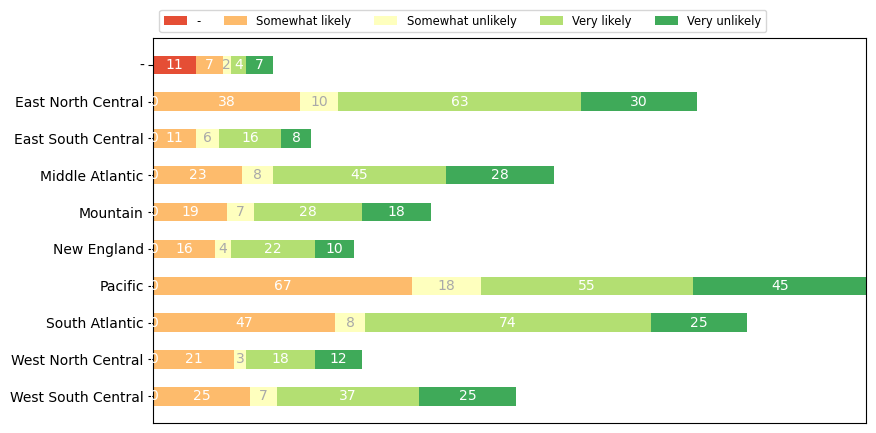

In [56]:
import matplotlib.pyplot as plt
import numpy as np




results = df.groupby('US Region')['degree of desire'].value_counts().unstack().fillna(0)


category_names = results.columns
labels = results.index

def survey(results, category_names):
    data = np.array(results)  
    data_cum = data.cumsum(axis=1)  
    category_colors = plt.cm.RdYlGn(np.linspace(0.15, 0.85, data.shape[1]))  

    plt.figure(figsize=(9.2, 5)) 

    plt.gca().invert_yaxis()  
    plt.gca().xaxis.set_visible(False)  
    plt.gca().set_xlim(0, np.sum(data, axis=1).max())  
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i] 
        starts = data_cum[:, i] - widths  
        rects = plt.barh(labels, widths, left=starts, height=0.5,
                         label=colname, color=color)  

        r, g, b, _ = color  
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'  
        plt.bar_label(rects, label_type='center', color=text_color)  

    plt.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
               loc='lower left', fontsize='small')  

    plt.show()


survey(results, category_names)